In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset columns: Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
First few rows of the dataset:
   Unnamed: 0          id        date     price  bedrooms  bathrooms  \
0           0  7129300520  2014-10-13  221900.0         3       1.00   
1           1  6414100192  2014-12-09  538000.0         3       2.25   
2           2  5631500400  2015-02-25  180000.0         2       1.00   
3           3  2487200875  2014-12-09  604000.0         4       3.00   
4           4  1954400510  2015-02-18  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2

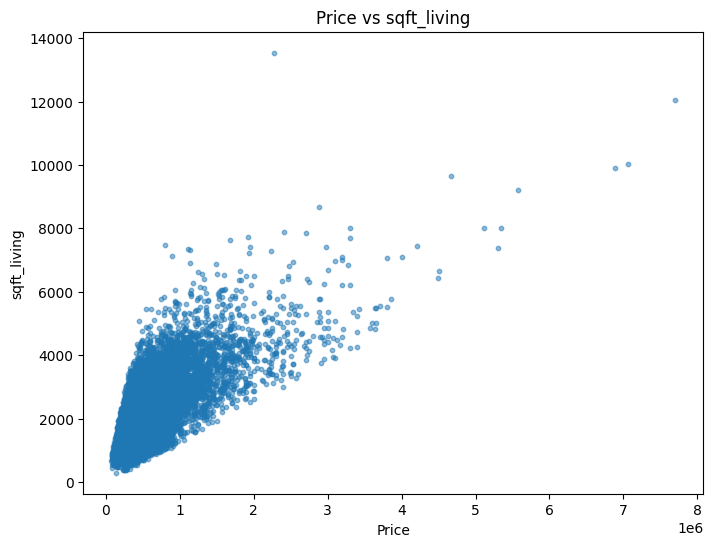

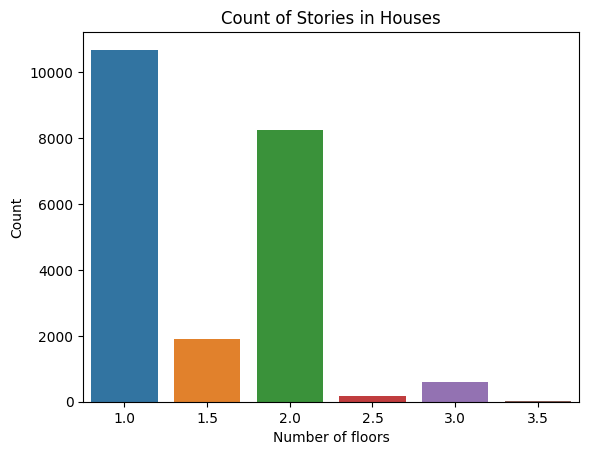

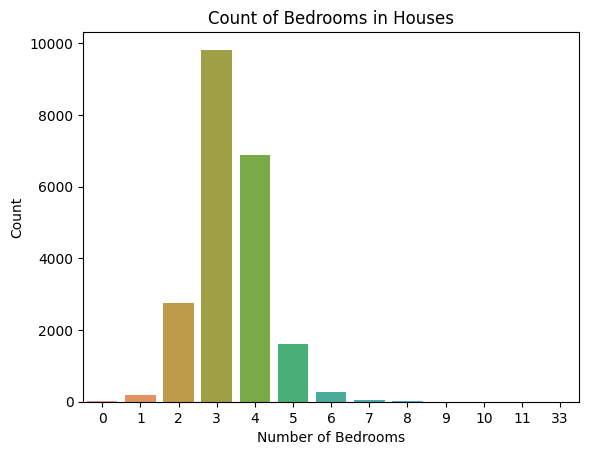

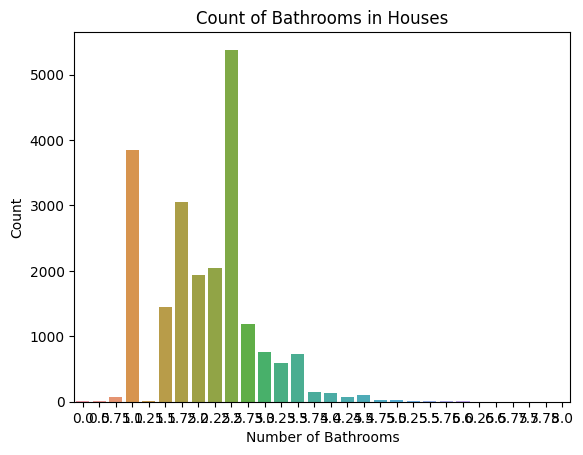

Non-numeric columns: Index(['date'], dtype='object')

Model Evaluation Metrics:
MAE: 0.016658022310926147
MSE: 0.0007732558925247864
Accuracy: 0.7026156991697319


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the new dataset
df = pd.read_csv('/kaggle/input/house-prices/kc_final.csv')

# Inspect column names
print("Dataset columns:", df.columns)

# Adjust column names if necessary (e.g., if 'price' is 'Price' or something else)
target_column = 'price'  # Change this if the actual column name is different
feature_columns = [col for col in df.columns if col != target_column]

# Display basic information about the dataset
print("First few rows of the dataset:")
print(df.head())

print("\nDataset description:")
print(df.describe())

print("\nDataset info:")
print(df.info())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

print("\nDuplicate rows in the dataset:")
print(df.duplicated().sum())

# Visualize dataset
plt.figure(figsize=(8, 6))
plt.scatter(df[target_column], df['sqft_living'], s=10, alpha=0.5)
plt.title('Price vs sqft_living')
plt.xlabel(target_column.capitalize())
plt.ylabel('sqft_living')
plt.show()

sns.countplot(data=df, x='floors')
plt.title('Count of Stories in Houses')
plt.xlabel('Number of floors')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='bedrooms')
plt.title('Count of Bedrooms in Houses')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='bathrooms')
plt.title('Count of Bathrooms in Houses')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

# Identify non-numeric columns and remove or transform them
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# If 'date' is in the dataset, convert it to datetime and extract useful features
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df.drop(columns='date', inplace=True)

# Encode categorical features
encoder = LabelEncoder()
encoding_cols = ['waterfront', 'view', 'condition', 'grade']

for col in encoding_cols:
    df[col] = encoder.fit_transform(df[col])

# Update feature columns after transformations
feature_columns = [col for col in df.columns if col != target_column]

# Prepare data for modeling
X = df[feature_columns]
y = df[target_column]

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_prediction = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("\nModel Evaluation Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"Accuracy: {r2}")
